# PD model

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Import data

In [3]:
data_backup = pd.read_csv('credit_risk_dataset.csv')

In [4]:
credit_data = data_backup.copy()

In [5]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
credit_data.shape

(32581, 12)

In [7]:
credit_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
credit_data['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [10]:
credit_data['person_emp_length'].fillna(0, inplace=True)

In [11]:
credit_data['person_emp_length'].isnull().sum()

0

In [12]:
credit_data['loan_int_rate'].mean()

11.01169489224439

In [13]:
credit_data['loan_int_rate'].fillna(credit_data['loan_int_rate'].mean(), inplace=True)

In [14]:
credit_data['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

credit_data['cb_person_default_on_file_int'] = np.where(credit_data['cb_person_default_on_file'] == 'Y', 1, 0)

credit_data['cb_person_default_on_file_int'].head()

In [15]:
credit_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [16]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [17]:
credit_data['loan_status'].unique()

array([1, 0], dtype=int64)

### continuous variables: 
'person_age', 

'person_income', 

'person_emp_length', 

'loan_amnt', 

'loan_int_rate', 

'loan_percent_income', 

'cb_person_cred_hist_length'

### discrete variables: 
'person_home_ownership', 

'loan_grade', 

'loan_intent', 

'cb_person_default_on_file'

### target variable: 
'loan_status'

In [18]:
credit_data['person_age'].describe()

count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

(array([4.877e+03, 7.438e+03, 7.652e+03, 3.541e+03, 3.422e+03, 1.565e+03,
        1.646e+03, 6.750e+02, 7.000e+02, 3.050e+02, 2.960e+02, 1.240e+02,
        1.270e+02, 5.400e+01, 5.000e+01, 2.400e+01, 3.100e+01, 1.000e+01,
        1.900e+01, 5.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([ 20.  ,  22.48,  24.96,  27.44,  29.92,  32.4 ,  34.88,  37.36,
         39.84,  42.32,  44.8 ,  47.28,  49.76,  52.24,  54.72,  57.2 ,
         59.68,  62.16,  64.64,  67.12,  69.6 ,  72.08,  74.56,  77.04,
         79.52,  82.  ,  84.48,  86.96,  89.44,  91.92,  94.4 ,  96.88,
         99.36, 101.84, 104.32, 106.8 , 109.28, 111.76, 114.24, 116.72,
        119.2 , 

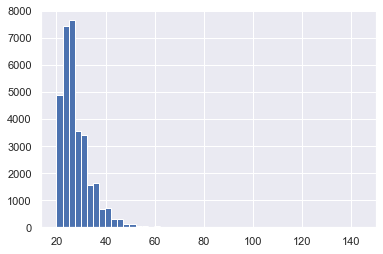

In [19]:
plt.hist(x='person_age', data=credit_data, bins=50)

In [20]:
(credit_data['person_age'] > 120).sum()

5

In [21]:
credit_data = credit_data[credit_data['person_age']<120]

In [22]:
credit_data['person_income'].describe()

count    3.257600e+04
mean     6.588214e+04
std      5.253499e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      2.039784e+06
Name: person_income, dtype: float64

In [23]:
credit_data['person_emp_length'].describe()

count    32576.000000
mean         4.657938
std          4.159740
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [24]:
credit_data['loan_amnt'].describe()

count    32576.000000
mean      9589.117755
std       6321.886846
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [25]:
credit_data['loan_int_rate'].describe()

count    32576.000000
mean        11.011561
std          3.081787
min          5.420000
25%          8.490000
50%         11.011695
75%         13.110000
max         23.220000
Name: loan_int_rate, dtype: float64

In [26]:
credit_data['loan_percent_income'].describe()

count    32576.000000
mean         0.170212
std          0.106778
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

In [27]:
credit_data['cb_person_cred_hist_length'].describe()

count    32576.000000
mean         5.803966
std          4.053791
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

### create dummy varialbes for discrete variables:

In [28]:
credit_data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [29]:
credit_data['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [30]:
credit_data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [31]:
dummies = [
    pd.get_dummies(credit_data['person_home_ownership'], prefix='person_home_ownership', prefix_sep=':'),
    pd.get_dummies(credit_data['loan_grade'], prefix='loan_grade', prefix_sep=':'), 
    pd.get_dummies(credit_data['cb_person_default_on_file'], prefix='cb_person_default_on_file', prefix_sep=':'),
    pd.get_dummies(credit_data['loan_intent'], prefix='loan_intent', prefix_sep=':')
]

In [32]:
dummies = pd.concat(dummies, axis=1)

In [33]:
type(dummies)

pandas.core.frame.DataFrame

credit_data['cb_person_default_on_file:Y'] = credit_data['cb_person_default_on_file_int']

credit_data['cb_person_default_on_file:N'] = 1 - credit_data['cb_person_default_on_file:Y'] 

In [34]:
credit_data = pd.concat([credit_data, dummies], axis=1)

In [35]:
type(credit_data)

pandas.core.frame.DataFrame

In [36]:
credit_data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,0,0,0,1,0,0,0,0,1,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0,0,1,0,0,1,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0,0,1,0,0,0,0,1,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0,0,1,0,0,0,0,1,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0,0,0,1,0,0,0,1,0,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,...,0,0,1,0,0,0,0,0,0,1
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,...,0,0,1,0,0,1,0,0,0,0
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,...,0,0,1,0,0,0,0,1,0,0
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,...,0,0,1,0,0,0,0,0,1,0
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,...,0,0,1,0,0,0,0,0,0,1


In [37]:
credit_data['loan_status'].sum() / credit_data.shape[0]

0.2181974459724951

We guess 'loan_status' = 1 means that the loan is defaulted.

After some examination below. We deduct that our guess is true. So we change the dependent variable to 'good_bad' having 1 representing a non-default (good) situation.

In [38]:
credit_data['good_bad'] = 1 - credit_data['loan_status']

In [39]:
credit_data['good_bad'].sum() / credit_data.shape[0]

0.7818025540275049

Independent Variables dummies classing according to **WoE**

fine classing -> WoE calculation -> Coarse classing

# $\text{WoE}_{i}=\ln \left(\frac{\%(y=1)_i}{\%(y=0)_i}\right)$

Information Value (IF)

# $\text{IF} = \sum_{i=1}^{k}\left[\left(\%(y=1)_i-\%(y=0)_i\right)\right]\times\text{WoE_i}$
Suppose there are k categories for this variable. Either continuous after classing or discrete.

More advanced methods: classing with WoE and sample size. abnormal values goes to the two side classes.

## Splitting data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(credit_data.drop('good_bad', axis=1), credit_data['good_bad'], test_size=0.2, random_state=42)

In [41]:
X_train.shape

(26060, 31)

In [42]:
y_train.shape

(26060,)

In [43]:
X_test.shape

(6516, 31)

In [44]:
y_test.shape

(6516,)

# ***marker for rerun

In [123]:
#X_prep = X_train
#y_prep = y_train
X_prep = X_test
y_prep = y_test

# Automatic WoE and IV calculator

In [46]:
def woe_discrete(df, var_name, df_target):
    df = pd.concat([df[var_name], df_target],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [47]:
def woe_continuous(df, var_name, df_target):
    df = pd.concat([df[var_name], df_target],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

# WoE Plotter

In [48]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

# classing discrete variables

In [124]:
X_prep['person_home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

In [125]:
df = woe_discrete(X_prep, 'person_home_ownership', y_prep)

In [126]:
df

,person_home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,3308,0.688331,0.507673,2277.0,1031.0,0.446821,0.726056,-0.485469,NaN,NaN,0.347383
1,OTHER,14,0.785714,0.002149,11.0,3.0,0.002159,0.002113,0.021484,0.097383,0.506953,0.347383
2,MORTGAGE,2676,0.871076,0.410681,2331.0,345.0,0.457418,0.242958,0.632709,0.085362,0.611225,0.347383
3,OWN,518,0.920849,0.079497,477.0,41.0,0.093603,0.028873,1.176145,0.049773,0.543436,0.347383


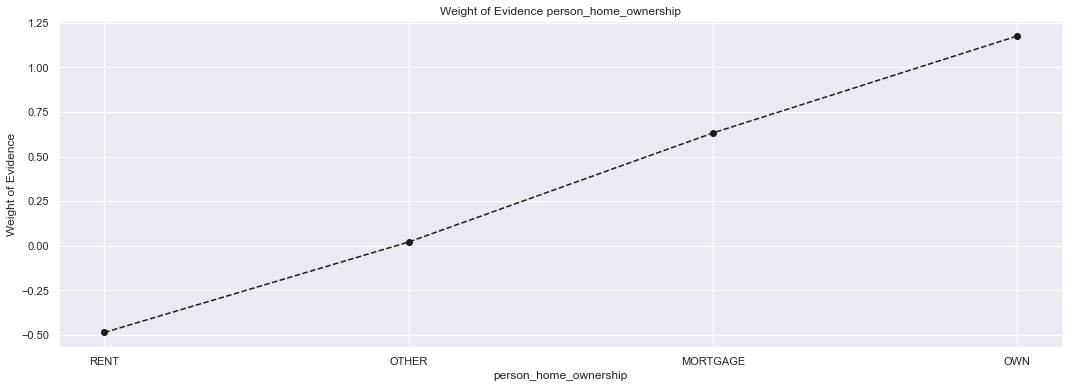

In [127]:
plot_by_woe(df)

In [128]:
# 'person_home_ownership:OWN', 'person_home_ownership:MORGAGE', 'person_home_ownership:OTHER_RENT'

X_prep['person_home_ownership:OTHER_RENT'] = sum([X_prep['person_home_ownership:OTHER'], X_prep['person_home_ownership:RENT']])

In [129]:
df= woe_discrete(X_prep,'cb_person_default_on_file',y_prep)

In [130]:
df

,cb_person_default_on_file,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Y,1111,0.628263,0.170503,698.0,413.0,0.13697,0.290845,-0.753028,NaN,NaN,0.146089
1,N,5405,0.813691,0.829497,4398.0,1007.0,0.86303,0.709155,0.196375,0.185428,0.949403,0.146089


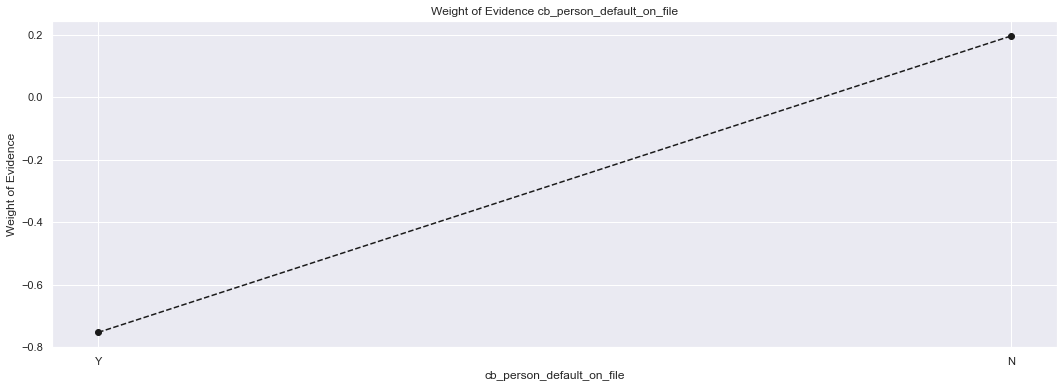

In [131]:
plot_by_woe(df)

In [132]:
# 'cb_person_default_on_file:Y', 'cb_person_default_on_file:N'

In [133]:
X_prep['loan_grade'].unique()

array(['A', 'B', 'E', 'C', 'D', 'F', 'G'], dtype=object)

In [134]:
df = woe_discrete(X_prep, 'loan_grade', y_prep)

In [135]:
df

,loan_grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,5,0.200000,0.000767,1.0,4.0,0.000196,0.002817,-2.664093,NaN,NaN,0.843327
1,F,51,0.254902,0.007827,13.0,38.0,0.002551,0.026761,-2.350436,0.054902,0.313658,0.843327
2,D,724,0.403315,0.111111,292.0,432.0,0.057300,0.304225,-1.669471,0.148413,0.680965,0.843327
3,E,208,0.408654,0.031921,85.0,123.0,0.016680,0.086620,-1.647332,0.005339,0.022139,0.843327
4,C,1243,0.800483,0.190761,995.0,248.0,0.195251,0.174648,0.111515,0.391829,1.758847,0.843327
5,B,2069,0.826970,0.317526,1711.0,358.0,0.335754,0.252113,0.286501,0.026487,0.174986,0.843327
6,A,2216,0.902076,0.340086,1999.0,217.0,0.392268,0.152817,0.942706,0.075106,0.656205,0.843327


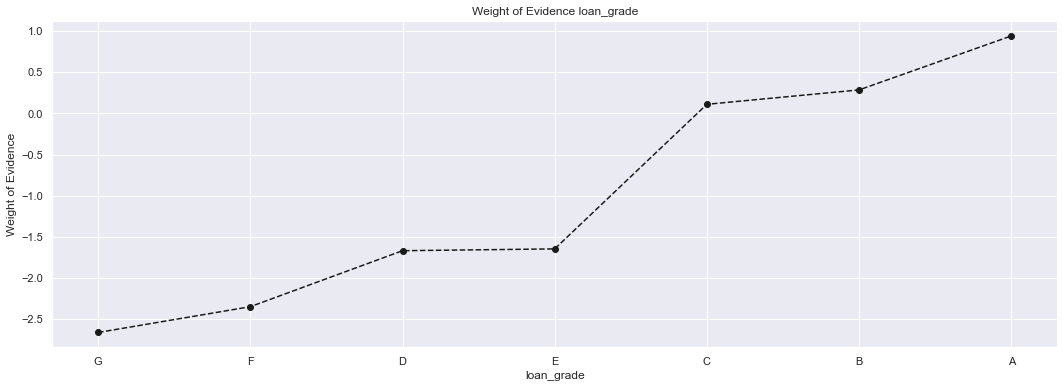

In [136]:
plot_by_woe(df)

In [137]:
# 'loan_grade:A',  'loan_grade:B', 'loan_grade:C', 'loan_grade:D', 'loan_grade:E', 'loan_grade:F', 'loan_grade:G',

In [138]:
X_prep['loan_intent'].unique()

array(['MEDICAL', 'PERSONAL', 'EDUCATION', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT', 'VENTURE'], dtype=object)

In [139]:
df = woe_discrete(X_prep, 'loan_intent', y_prep)

In [140]:
df

,loan_intent,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,MEDICAL,1194,0.718593,0.183241,858.0,336.0,0.168367,0.236620,-0.340306,NaN,NaN,0.096507
1,HOMEIMPROVEMENT,723,0.733057,0.110958,530.0,193.0,0.104003,0.135915,-0.267612,0.014464,0.072694,0.096507
2,DEBTCONSOLIDATION,1023,0.737048,0.156998,754.0,269.0,0.147959,0.189437,-0.247118,0.003991,0.020494,0.096507
3,PERSONAL,1106,0.803797,0.169736,889.0,217.0,0.174451,0.152817,0.132401,0.066750,0.379519,0.096507
4,EDUCATION,1300,0.814615,0.199509,1059.0,241.0,0.207810,0.169718,0.202484,0.010818,0.070084,0.096507
5,VENTURE,1170,0.859829,0.179558,1006.0,164.0,0.197410,0.115493,0.536072,0.045214,0.333588,0.096507


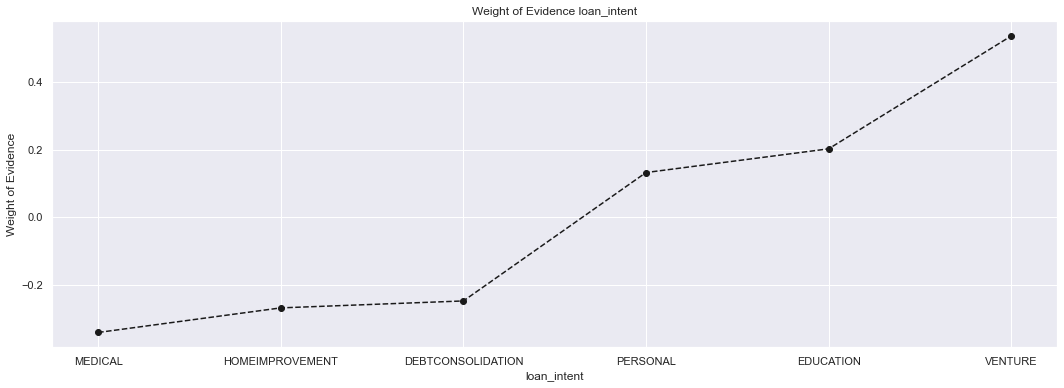

In [141]:
plot_by_woe(df)

In [142]:
# 'loan_intent:DEBTCONSOLIDATION', 'loan_intent:EDUCATION', 'loan_intent:HOMEIMPROVEMENT', 'loan_intent:MEDICAL', 'loan_intent:PERSONAL', 'loan_intent:VENTURE'

# Classing continuous variables

'person_age'

In [143]:
X_prep['person_age'].unique()

array([25, 40, 22, 21, 26, 31, 24, 34, 36, 23, 27, 28, 43, 29, 35, 37, 30,
       32, 39, 45, 51, 48, 44, 41, 33, 70, 80, 38, 65, 42, 47, 61, 49, 20,
       58, 46, 50, 53, 60, 55, 54, 56, 69, 64, 52, 62, 66, 57, 59],
      dtype=int64)

In [144]:
df = woe_continuous(X_prep, 'person_age', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [145]:
df

,person_age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,20,4,0.750000,0.000614,3.0,1.0,0.000589,0.000704,-0.179187,NaN,NaN,inf
1,21,250,0.656000,0.038367,164.0,86.0,0.032182,0.060563,-0.632280,0.094000,0.453093,inf
2,22,759,0.749671,0.116483,569.0,190.0,0.111656,0.133803,-0.180943,0.093671,0.451337,inf
3,23,789,0.793409,0.121087,626.0,163.0,0.122841,0.114789,0.067801,0.043739,0.248744,inf
4,24,668,0.760479,0.102517,508.0,160.0,0.099686,0.112676,-0.122491,0.032930,0.190293,inf
5,25,657,0.811263,0.100829,533.0,124.0,0.104592,0.087324,0.180441,0.050784,0.302932,inf
6,26,474,0.789030,0.072744,374.0,100.0,0.073391,0.070423,0.041287,0.022234,0.139154,inf
7,27,409,0.797066,0.062769,326.0,83.0,0.063972,0.058451,0.090258,0.008036,0.048971,inf
8,28,374,0.783422,0.057397,293.0,81.0,0.057496,0.057042,0.007924,0.013644,0.082333,inf
9,29,339,0.769912,0.052026,261.0,78.0,0.051217,0.054930,-0.069987,0.013511,0.077912,inf


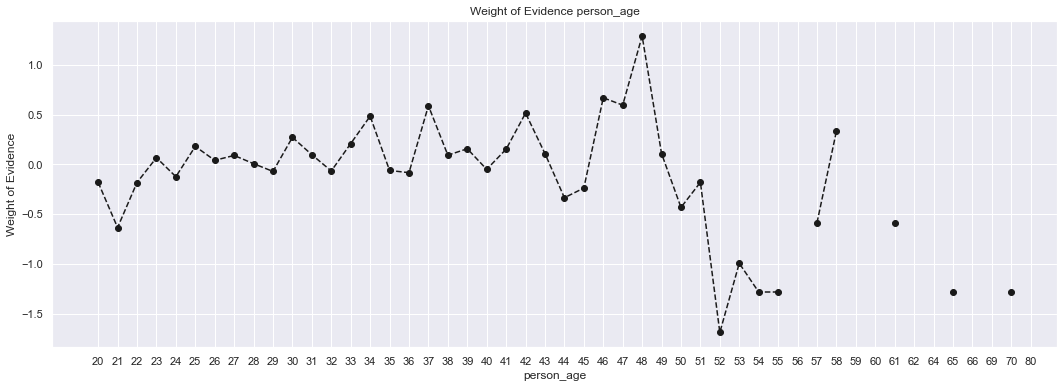

In [146]:
plot_by_woe(df)

In [147]:
# 'person_age:>37'

In [148]:
X_prep_temp = X_prep[X_prep['person_age']<=37]

In [149]:
df = woe_continuous(X_prep_temp, 'person_age', y_prep[X_prep_temp.index])

In [150]:
df

,person_age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,20,4,0.750000,0.000662,3.0,1.0,0.000636,0.000758,-0.176323,NaN,NaN,0.044682
1,21,250,0.656000,0.041398,164.0,86.0,0.034746,0.065201,-0.629416,0.094000,0.453093,0.044682
2,22,759,0.749671,0.125683,569.0,190.0,0.120551,0.144049,-0.178079,0.093671,0.451337,0.044682
3,23,789,0.793409,0.130651,626.0,163.0,0.132627,0.123578,0.070665,0.043739,0.248744,0.044682
4,24,668,0.760479,0.110614,508.0,160.0,0.107627,0.121304,-0.119627,0.032930,0.190293,0.044682
5,25,657,0.811263,0.108793,533.0,124.0,0.112924,0.094011,0.183305,0.050784,0.302932,0.044682
6,26,474,0.789030,0.078490,374.0,100.0,0.079237,0.075815,0.044151,0.022234,0.139154,0.044682
7,27,409,0.797066,0.067726,326.0,83.0,0.069068,0.062926,0.093122,0.008036,0.048971,0.044682
8,28,374,0.783422,0.061931,293.0,81.0,0.062076,0.061410,0.010789,0.013644,0.082333,0.044682
9,29,339,0.769912,0.056135,261.0,78.0,0.055297,0.059136,-0.067123,0.013511,0.077912,0.044682


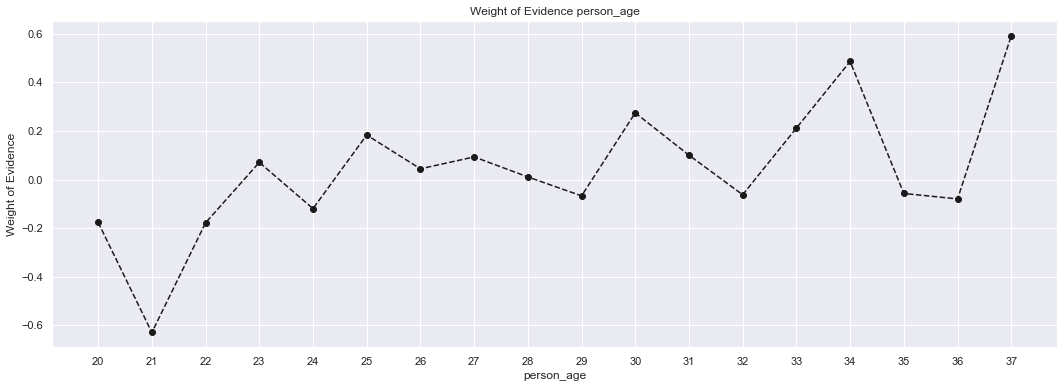

In [151]:
plot_by_woe(df)

In [152]:
# 'person_age:<=22', 'person_age:23-28', 'person_age:29-32', 'person_age:33-37',  'person_age:>=38'

X_prep['person_age:<=22'] = np.where((X_prep['person_age']<=22), 1, 0)

X_prep['person_age:23-28'] = np.where((X_prep['person_age']>=23) & (X_prep['person_age']<=28), 1, 0)

X_prep['person_age:29-33'] = np.where((X_prep['person_age']>=29) & (X_prep['person_age']<=32), 1, 0)

X_prep['person_age:34-37'] = np.where((X_prep['person_age']>=33) & (X_prep['person_age']<=37), 1, 0)

X_prep['person_age:>=38'] = np.where((X_prep['person_age']>=38), 1, 0)

'person_income'

In [153]:
X_prep['person_income'].nunique()

1414

In [154]:
X_prep['person_income_factor'] = pd.cut(X_prep['person_income'], 50)

In [155]:
df = woe_continuous(X_prep, 'person_income_factor', y_prep)

In [156]:
df

,person_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4106.0, 43880.0]",2125,0.641412,0.326120,1363.0,762.0,0.267465,0.536620,-0.696302,NaN,NaN,inf
1,"(43880.0, 81760.0]",2916,0.817901,0.447514,2385.0,531.0,0.468014,0.373944,0.224393,0.176489,0.920696,inf
2,"(81760.0, 119640.0]",897,0.910814,0.137661,817.0,80.0,0.160322,0.056338,1.045813,0.092913,0.821420,inf
3,"(119640.0, 157520.0]",364,0.920330,0.055862,335.0,29.0,0.065738,0.020423,1.169036,0.009516,0.123222,inf
4,"(157520.0, 195400.0]",103,0.932039,0.015807,96.0,7.0,0.018838,0.004930,1.340639,0.011709,0.171603,inf
5,"(195400.0, 233280.0]",56,0.875000,0.008594,49.0,7.0,0.009615,0.004930,0.668111,0.057039,0.672528,inf
6,"(233280.0, 271160.0]",19,0.842105,0.002916,16.0,3.0,0.003140,0.002113,0.396177,0.032895,0.271934,inf
7,"(271160.0, 309040.0]",13,1.000000,0.001995,13.0,0.0,0.002551,0.000000,inf,0.157895,inf,inf
8,"(309040.0, 346920.0]",4,1.000000,0.000614,4.0,0.0,0.000785,0.000000,inf,0.000000,NaN,inf
9,"(346920.0, 384800.0]",2,1.000000,0.000307,2.0,0.0,0.000392,0.000000,inf,0.000000,NaN,inf


In [157]:
# 'person_income:>120K'
X_prep_temp = X_prep[X_prep['person_income']<120000]

In [158]:
X_prep_temp['person_income_factor'] = pd.cut(X_prep_temp['person_income'], 50)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
df = woe_continuous(X_prep_temp, 'person_income_factor', y_prep[X_prep_temp.index])

In [160]:
df

,person_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5886.996, 8260.08]",7,0.285714,0.001179,2.0,5.0,0.000438,0.003642,-2.117711,NaN,NaN,inf
1,"(8260.08, 10520.16]",15,0.066667,0.002526,1.0,14.0,0.000219,0.010197,-3.840478,0.219048,1.722767,inf
2,"(10520.16, 12780.24]",29,0.206897,0.004884,6.0,23.0,0.001314,0.016752,-2.545155,0.140230,1.295323,inf
3,"(12780.24, 15040.32]",40,0.050000,0.006736,2.0,38.0,0.000438,0.027677,-4.145859,0.156897,1.600704,inf
4,"(15040.32, 17300.4]",41,0.170732,0.006905,7.0,34.0,0.001533,0.024763,-2.781871,0.120732,1.363989,inf
5,"(17300.4, 19560.48]",74,0.202703,0.012462,15.0,59.0,0.003286,0.042972,-2.570908,0.031971,0.210963,inf
6,"(19560.48, 21820.56]",85,0.705882,0.014315,60.0,25.0,0.013143,0.018208,-0.325952,0.503180,2.244956,inf
7,"(21820.56, 24080.64]",146,0.671233,0.024587,98.0,48.0,0.021468,0.034960,-0.487654,0.034649,0.161702,inf
8,"(24080.64, 26340.72]",116,0.698276,0.019535,81.0,35.0,0.017744,0.025492,-0.362319,0.027043,0.125335,inf
9,"(26340.72, 28600.8]",129,0.720930,0.021724,93.0,36.0,0.020372,0.026220,-0.252340,0.022654,0.109979,inf


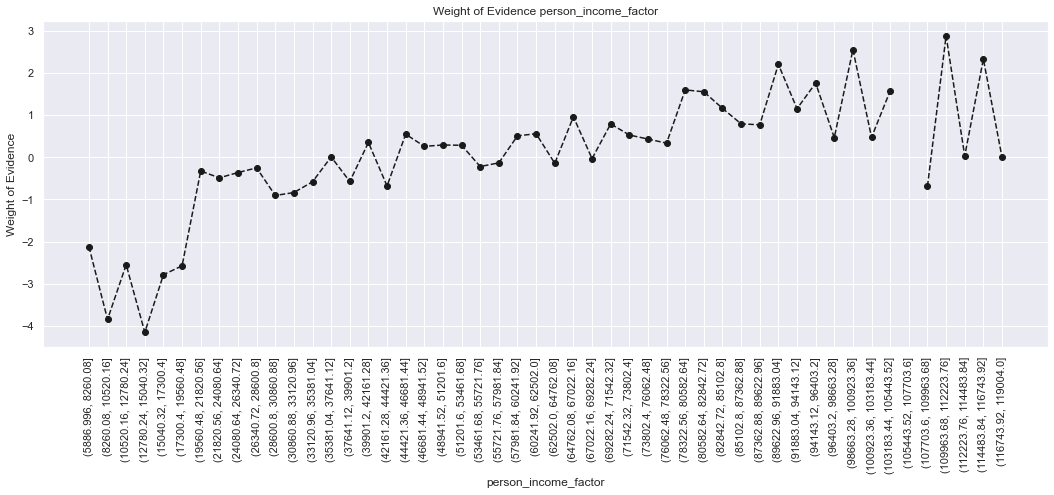

In [161]:
plot_by_woe(df, 90)

In [162]:
# 'person_income:<=20K', 'person_income:20K-34K',  'person_income:34K-52.5K', 'person_income:52.5K-66.5K', 'person_income:66.5K-75.7K',  'person_income:>75.7K',

X_prep['person_income:<=20K'] = np.where((X_prep['person_age']<=20000), 1, 0)

X_prep['person_income:20K-34K'] = np.where((X_prep['person_income']>20000) & (X_prep['person_age']<=34000), 1, 0)

X_prep['person_income:34K-52.5K'] = np.where((X_prep['person_income']>34000) & (X_prep['person_age']<=52500), 1, 0)

X_prep['person_income:52.5K-66.5K'] = np.where((X_prep['person_income']>52500) & (X_prep['person_age']<=66500), 1, 0)

X_prep['person_income:66.5K-75.7K'] = np.where((X_prep['person_income']>66500) & (X_prep['person_age']<=75700), 1, 0)

X_prep['person_income:>75.7K'] = np.where((X_prep['person_income']>75700), 1, 0)

'person_emp_length'

In [163]:
X_prep['person_emp_length'].unique()

array([ 1.,  3.,  6.,  4., 10.,  2.,  5.,  8.,  7.,  0., 12.,  9., 18.,
       11., 14., 13., 21., 17., 16., 22., 20., 15., 19., 23., 31., 30.,
       26., 25.])

In [164]:
df = woe_continuous(X_prep, 'person_emp_length', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [165]:
df

,person_emp_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,999,0.719720,0.153315,719.0,280.0,0.141091,0.197183,-0.334727,NaN,NaN,inf
1,1.0,601,0.725458,0.092234,436.0,165.0,0.085557,0.116197,-0.306102,0.005738,0.028625,inf
2,2.0,760,0.756579,0.116636,575.0,185.0,0.112834,0.130282,-0.143785,0.031121,0.162317,inf
3,3.0,665,0.818045,0.102056,544.0,121.0,0.106750,0.085211,0.225360,0.061466,0.369144,inf
4,4.0,558,0.802867,0.085635,448.0,110.0,0.087912,0.077465,0.126514,0.015178,0.098846,inf
5,5.0,600,0.781667,0.092081,469.0,131.0,0.092033,0.092254,-0.002394,0.021201,0.128907,inf
6,6.0,550,0.807273,0.084408,444.0,106.0,0.087127,0.074648,0.154586,0.025606,0.156980,inf
7,7.0,423,0.796690,0.064917,337.0,86.0,0.066130,0.060563,0.087937,0.010582,0.066650,inf
8,8.0,347,0.809798,0.053254,281.0,66.0,0.055141,0.046479,0.170901,0.013108,0.082964,inf
9,9.0,300,0.826667,0.046041,248.0,52.0,0.048666,0.036620,0.284386,0.016868,0.113485,inf


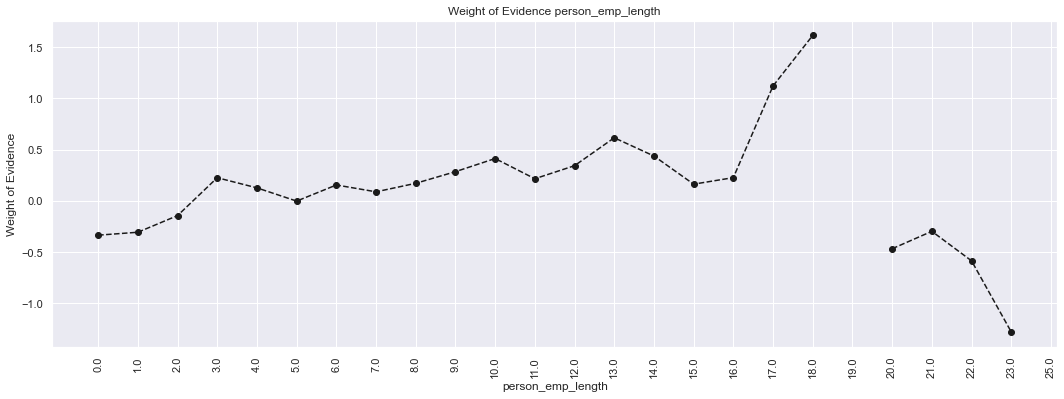

In [166]:
plot_by_woe(df,90)

In [167]:
# 'person_emp_length:<=2', 'person_emp_length:3-7', 'person_emp_length:8-10', 'person_emp_length:>10',



In [168]:
X_prep['person_emp_length:<=2'] = np.where((X_prep['person_emp_length']<=2), 1, 0)

X_prep['person_emp_length:3-7'] = np.where((X_prep['person_emp_length']>2) & (X_prep['person_emp_length']<=7), 1, 0)

X_prep['person_emp_length:8-10'] = np.where((X_prep['person_emp_length']>7) & (X_prep['person_emp_length']<=10), 1, 0)

X_prep['person_emp_length:>10'] = np.where((X_prep['person_emp_length']>10), 1, 0)

'loan_amnt'

In [169]:
X_prep['loan_amnt'].nunique()

435

In [170]:
X_prep['loan_amnt_factor'] = pd.cut(X_prep['loan_amnt'], 50)

In [171]:
df = woe_continuous(X_prep, 'loan_amnt_factor', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [172]:
df

,loan_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",79,0.848101,0.012124,67.0,12.0,0.013148,0.008451,0.441987,NaN,NaN,inf
1,"(1190.0, 1880.0]",169,0.810651,0.025936,137.0,32.0,0.026884,0.022535,0.176446,0.037450,0.265541,inf
2,"(1880.0, 2570.0]",317,0.810726,0.048649,257.0,60.0,0.050432,0.042254,0.176932,0.000075,0.000486,inf
3,"(2570.0, 3260.0]",316,0.772152,0.048496,244.0,72.0,0.047881,0.050704,-0.057297,0.038574,0.234229,inf
4,"(3260.0, 3950.0]",187,0.770053,0.028699,144.0,43.0,0.028257,0.030282,-0.069186,0.002098,0.011889,inf
5,"(3950.0, 4640.0]",343,0.813411,0.052640,279.0,64.0,0.054749,0.045070,0.194530,0.043358,0.263716,inf
6,"(4640.0, 5330.0]",570,0.815789,0.087477,465.0,105.0,0.091248,0.073944,0.210278,0.002378,0.015748,inf
7,"(5330.0, 6020.0]",463,0.807775,0.071056,374.0,89.0,0.073391,0.062676,0.157820,0.008014,0.052458,inf
8,"(6020.0, 6710.0]",149,0.785235,0.022867,117.0,32.0,0.022959,0.022535,0.018639,0.022540,0.139181,inf
9,"(6710.0, 7400.0]",313,0.827476,0.048036,259.0,54.0,0.050824,0.038028,0.290045,0.042241,0.271406,inf


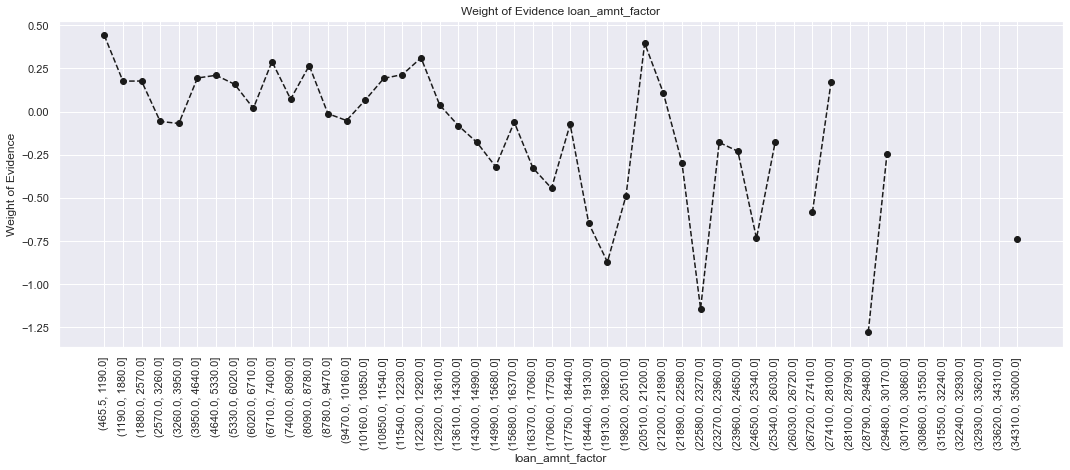

In [173]:
plot_by_woe(df,90)

In [174]:
# 'loan_amnt:<=3260', 'loan_amnt:3260-8090', 'loan_amnt:8090-12230', 'loan_amnt:12230-18440',  'loan_amnt:>18440',

X_prep['loan_amnt:<=3260'] = np.where((X_prep['loan_amnt']<=3260), 1, 0)

X_prep['loan_amnt:3260-8090'] = np.where((X_prep['loan_amnt']>3260) & (X_prep['loan_amnt']<=8090), 1, 0)

X_prep['loan_amnt:8090-12230'] = np.where((X_prep['loan_amnt']>8090) & (X_prep['loan_amnt']<=12230), 1, 0)

X_prep['loan_amnt:12230-18440'] = np.where((X_prep['loan_amnt']>12230) & (X_prep['loan_amnt']<=18440), 1, 0)

X_prep['loan_amnt:>18440'] = np.where((X_prep['loan_amnt']>18440), 1, 0)

'loan_int_rate',

In [175]:
X_prep['loan_int_rate'].nunique()

285

In [176]:
X_prep['loan_int_rate_factor'] = pd.cut(X_prep['loan_int_rate'], 50)

In [177]:
df = woe_continuous(X_prep, 'loan_int_rate_factor',y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [178]:
df

,loan_int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.404, 5.746]",120,0.975000,0.018416,117.0,3.0,0.022959,0.002113,2.385763,NaN,NaN,inf
1,"(5.746, 6.073]",261,0.938697,0.040055,245.0,16.0,0.048077,0.011268,1.450870,0.036303,0.934892,inf
2,"(6.073, 6.399]",56,0.964286,0.008594,54.0,2.0,0.010597,0.001408,2.018038,0.025588,0.567167,inf
3,"(6.399, 6.726]",147,0.891156,0.022560,131.0,16.0,0.025706,0.011268,0.824810,0.073129,1.193228,inf
4,"(6.726, 7.052]",207,0.913043,0.031768,189.0,18.0,0.037088,0.012676,1.073576,0.021887,0.248767,inf
5,"(7.052, 7.378]",143,0.944056,0.021946,135.0,8.0,0.026491,0.005634,1.548034,0.031012,0.474458,inf
6,"(7.378, 7.705]",364,0.884615,0.055862,322.0,42.0,0.063187,0.029577,0.759083,0.059441,0.788951,inf
7,"(7.705, 8.031]",326,0.895706,0.050031,292.0,34.0,0.057300,0.023944,0.872594,0.011090,0.113511,inf
8,"(8.031, 8.358]",18,0.777778,0.002762,14.0,4.0,0.002747,0.002817,-0.025036,0.117928,0.897630,inf
9,"(8.358, 8.684]",134,0.835821,0.020565,112.0,22.0,0.021978,0.015493,0.349657,0.058043,0.374693,inf


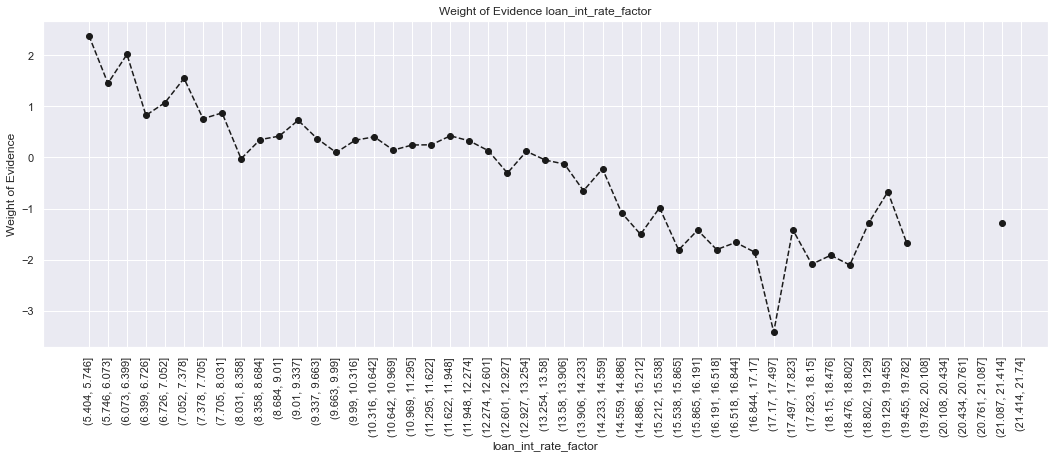

In [179]:
plot_by_woe(df,90)

In [180]:
# 'loan_int_rate:<=6.488', 'loan_int_rate:6.488-9.692', 'loan_int_rate:9.692-10.76', 'loan_int_rate:10.76-13.964', 'loan_int_rate:13.964-15.388', 'loan_int_rate:15.388-17.88', 'loan_int_rate:>17.88',

X_prep['loan_int_rate:<=6.488'] = np.where((X_prep['loan_int_rate']<=6.488), 1, 0)

X_prep['loan_int_rate:6.488-9.692'] = np.where((X_prep['loan_int_rate']>6.488) & (X_prep['loan_int_rate']<=9.692), 1, 0)

X_prep['loan_int_rate:9.692-10.76'] = np.where((X_prep['loan_int_rate']>9.692) & (X_prep['loan_int_rate']<=10.76), 1, 0)

X_prep['loan_int_rate:10.76-13.964'] = np.where((X_prep['loan_int_rate']>10.76) & (X_prep['loan_int_rate']<=13.964), 1, 0)

X_prep['loan_int_rate:13.964-15.388'] = np.where((X_prep['loan_int_rate']>13.964) & (X_prep['loan_int_rate']<=15.388), 1, 0)

X_prep['loan_int_rate:15.388-17.88'] = np.where((X_prep['loan_int_rate']>15.388) & (X_prep['loan_int_rate']<=17.88), 1, 0)

X_prep['loan_int_rate:>17.88'] = np.where((X_prep['loan_int_rate']>17.88), 1, 0)

'loan_percent_income', 

In [181]:
X_prep['loan_percent_income'].nunique()

66

In [182]:
X_prep['loan_percent_income_factor'] = pd.cut(X_prep['loan_percent_income'], 50)

In [183]:
df = woe_continuous(X_prep,'loan_percent_income_factor',y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [184]:
df

,loan_percent_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.00067, 0.0134]",33,1.000000,0.005064,33.0,0.0,0.006476,0.000000,inf,NaN,NaN,inf
1,"(0.0134, 0.0268]",80,0.912500,0.012277,73.0,7.0,0.014325,0.004930,1.066750,0.087500,inf,inf
2,"(0.0268, 0.0402]",364,0.914835,0.055862,333.0,31.0,0.065345,0.021831,1.096356,0.002335,0.029606,inf
3,"(0.0402, 0.0536]",233,0.828326,0.035758,193.0,40.0,0.037873,0.028169,0.296012,0.086509,0.800345,inf
4,"(0.0536, 0.067]",275,0.890909,0.042204,245.0,30.0,0.048077,0.021127,0.822262,0.062583,0.526250,inf
5,"(0.067, 0.0804]",535,0.859813,0.082106,460.0,75.0,0.090267,0.052817,0.535939,0.031096,0.286322,inf
6,"(0.0804, 0.0938]",282,0.858156,0.043278,242.0,40.0,0.047488,0.028169,0.522259,0.001657,0.013680,inf
7,"(0.0938, 0.107]",297,0.875421,0.045580,260.0,37.0,0.051020,0.026056,0.671965,0.017265,0.149705,inf
8,"(0.107, 0.121]",545,0.882569,0.083640,481.0,64.0,0.094388,0.045070,0.739185,0.007148,0.067220,inf
9,"(0.121, 0.134]",292,0.907534,0.044813,265.0,27.0,0.052002,0.019014,1.006094,0.024965,0.266909,inf


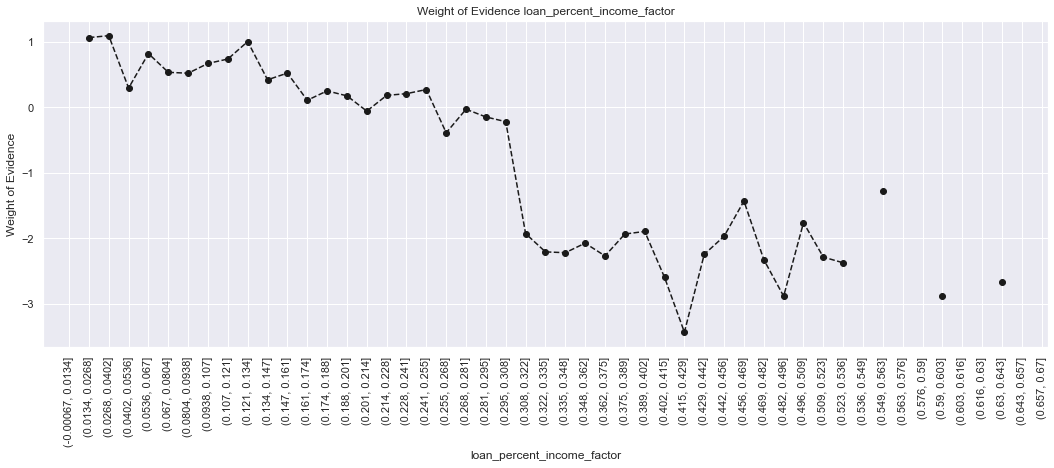

In [185]:
plot_by_woe(df,90)

In [186]:
# 'loan_percent_income:<=13.3pct', 'loan_percent_income:14.9-16.6pct', 'loan_percent_income:16.6-29.9pct', 'loan_percent_income:29.9-31.5pct', 'loan_percent_income:>31.5pct',

X_prep['loan_percent_income:<=13.3pct'] = np.where((X_prep['loan_percent_income']<=0.133), 1, 0)

X_prep['loan_percent_income:13.3-16.6pct'] = np.where((X_prep['loan_percent_income']>0.133) & (X_prep['loan_percent_income']<=0.166), 1, 0)

X_prep['loan_percent_income:16.6-29.9pct'] = np.where((X_prep['loan_percent_income']>0.166) & (X_prep['loan_percent_income']<=0.299), 1, 0)

X_prep['loan_percent_income:29.9-31.5pct'] = np.where((X_prep['loan_percent_income']>0.299) & (X_prep['loan_percent_income']<=0.315), 1, 0)

X_prep['loan_percent_income:>31.5pct'] = np.where((X_prep['loan_percent_income']>0.315), 1, 0)

'cb_person_cred_hist_length'

In [187]:
X_prep['cb_person_cred_hist_length'].unique()

array([ 4, 12,  3,  5,  2,  9, 11,  6, 15, 13,  8, 10,  7, 16, 26, 17, 14,
       24, 25, 28, 20, 23, 18, 22, 19, 21, 30, 27, 29], dtype=int64)

In [188]:
df = woe_continuous(X_prep,'cb_person_cred_hist_length',y_prep)

In [189]:
df

,cb_person_cred_hist_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,1202,0.757072,0.184469,910.0,292.0,0.178571,0.205634,-0.141108,NaN,NaN,inf
1,3,1166,0.785592,0.178944,916.0,250.0,0.179749,0.176056,0.020756,0.028520,0.161865,inf
2,4,1233,0.771290,0.189227,951.0,282.0,0.186617,0.198592,-0.062192,0.014302,0.082948,inf
3,5,372,0.787634,0.057090,293.0,79.0,0.057496,0.055634,0.032926,0.016345,0.095118,inf
4,6,361,0.750693,0.055402,271.0,90.0,0.053179,0.063380,-0.175490,0.036942,0.208416,inf
5,7,373,0.823056,0.057244,307.0,66.0,0.060243,0.046479,0.259394,0.072364,0.434884,inf
6,8,371,0.800539,0.056937,297.0,74.0,0.058281,0.052113,0.111868,0.022517,0.147526,inf
7,9,374,0.802139,0.057397,300.0,74.0,0.058870,0.052113,0.121918,0.001600,0.010050,inf
8,10,391,0.805627,0.060006,315.0,76.0,0.061813,0.053521,0.144040,0.003488,0.022122,inf
9,11,87,0.770115,0.013352,67.0,20.0,0.013148,0.014085,-0.068839,0.035512,0.212879,inf


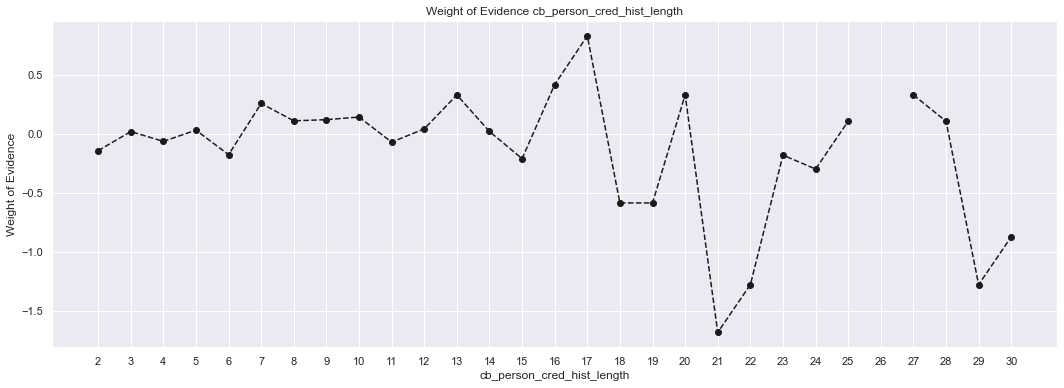

In [190]:
plot_by_woe(df)

In [ ]:
# 'cb_person_cred_hist_length', discard

In [121]:
X_prep.shape

(26060, 68)

In [122]:
X_train = X_prep

# rerun above for test data inputs

In [191]:
X_prep.shape

(6516, 68)

In [192]:
X_test = X_prep

In [193]:
# save data for modeling
X_train.to_csv('inputs_train.csv')
y_train.to_csv('targets_train.csv')
X_test.to_csv('inputs_test.csv')
y_test.to_csv('targets_test.csv')

In [ ]:
### continuous variables: 
'person_age', 
'person_income', 
'person_emp_length', 
'loan_amnt', 
'loan_int_rate', 
'loan_percent_income', 
'cb_person_cred_hist_length'

categories:
    
'person_home_ownership:OWN', 
'person_home_ownership:MORTGAGE', 
'person_home_ownership:OTHER_RENT',
'cb_person_default_on_file:Y', 
'cb_person_default_on_file:N',
'loan_grade:A',  
'loan_grade:B',
'loan_grade:C', 
'loan_grade:D', 
'loan_grade:E', 
'loan_grade:F', 
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'loan_intent:EDUCATION', 
'loan_intent:HOMEIMPROVEMENT',
'loan_intent:MEDICAL',
'loan_intent:PERSONAL',
'loan_intent:VENTURE',
'person_age:<=22', 
'person_age:23-28', 
'person_age:29-33', 
'person_age:34-37',  
'person_age:>=38',
'person_income:<=20K', 
'person_income:20K-34K',  
'person_income:34K-52.5K', 
'person_income:52.5K-66.5K', 
'person_income:66.5K-75.7K',  
'person_income:>75.7K',
'person_emp_length:<=2', 
'person_emp_length:3-7', 
'person_emp_length:8-10', 
'person_emp_length:>10',
'loan_amnt:<=3260', 
'loan_amnt:3260-8090', 
'loan_amnt:8090-12230', 
'loan_amnt:12230-18440',  
'loan_amnt:>18440',
'loan_int_rate:<=6.488', 
'loan_int_rate:6.488-9.692', 
'loan_int_rate:9.692-10.76', 
'loan_int_rate:10.76-13.964', 
'loan_int_rate:13.964-15.388', 
'loan_int_rate:15.388-17.88', 
'loan_int_rate:>17.88',
'loan_percent_income:<=13.3pct', 
'loan_percent_income:13.3-16.6pct', 
'loan_percent_income:16.6-29.9pct', 
'loan_percent_income:29.9-31.5pct', 
'loan_percent_income:>31.5pct',


reference categories:

'person_home_ownership:OTHER_RENT',
'cb_person_default_on_file:Y',
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'person_age:<=22',
'person_income:<=20K',
'person_emp_length:<=2',
'loan_amnt:>18440',
'loan_int_rate:>17.88',
'loan_percent_income:>31.5pct',
